In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [3]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[163.22822298 197.73519054 120.58687239]
 [107.74203793  95.60812971  71.63680878]]


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[160.65507903 204.76100645 114.71481267]
 [ 58.37121466  55.1944636   46.14034085]
 [143.94535194 128.31317092  97.22634307]
 [183.98456705 182.78074014 164.96576467]]


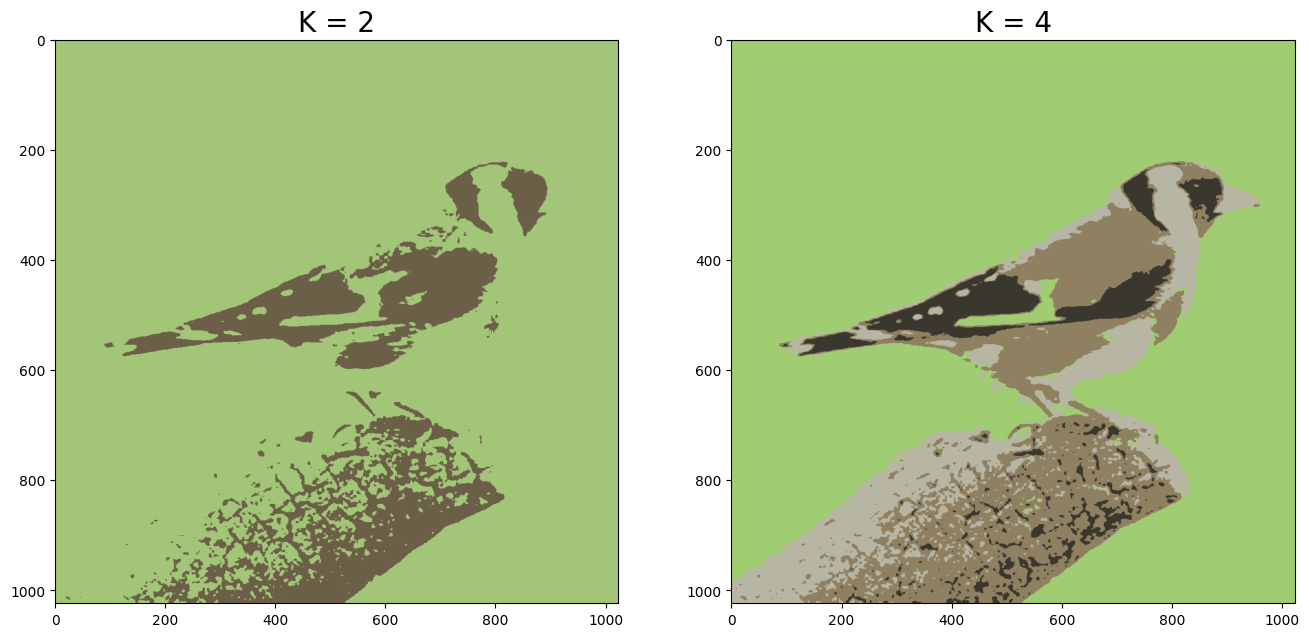

In [4]:
h, w, c = img.shape
print(img.shape)
Z = img.reshape((-1,3))
Ka = [2, 4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    # Perform k-means clustering
    label, center = km_clust(Z, K)
    # Now convert back to uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    plt.subplot(1, len(Ka), i+1)
    plt.title('K = %d'%K, fontsize=20)
    plt.imshow(res)
plt.show()

## 1-2. cluster with RGB values and the location

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[154.51808592 186.75774377 117.18395303 510.64481313 253.7552779 ]
 [156.36418833 180.11558214 110.30826894 512.34359034 765.74964338]]


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[155.54612721 177.46432385 109.30364723 255.86577788 766.0988671 ]
 [156.99582415 178.86347367 122.59294779 767.12887757 256.41112547]
 [157.2834299  183.22022833 111.50970876 767.51842503 768.5989903 ]
 [151.94467791 194.20314034 111.44845859 254.78613113 254.28776074]]


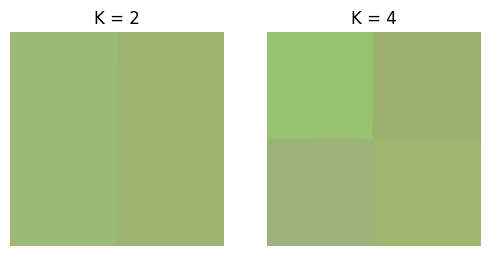

In [5]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[157.9644494  193.18357052 119.96299047 122.18125464  60.92018062]
 [153.20366753 174.70497439 108.15973188 132.95064658 187.56137137]]


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[166.08729384 199.6284535  129.64542125 168.1027678   51.54690968]
 [157.92460098 192.77440683 112.3522835   45.87185355 124.47037472]
 [167.56241542 206.0848175  123.0051362  169.33687258 211.78373766]
 [113.89137428 101.77892674  75.73733416 173.09496511 137.97560109]]


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[158.14295336 199.7697073  110.70476231  45.59325714 125.59781564]
 [132.27280472 119.97440512  90.40788139 218.41832657 127.83051764]
 [156.14088771 200.86989404 114.50704961  67.00146299  41.68755546]
 [162.56460494 144.88288895 105.69660603 123.98978007 156.67873473]
 [167.96598755 200.5427719  133.51440157 187.7179069   52.89146005]
 [166.59198894 198.43431413 122.18774085  56.25763363 220.42534494]
 [164.63020287 211.3277374  120.40361726 194.36927888 212.31214334]
 [ 47.03643371  47.97484584  45.91590442 116.74994219 136.64421249]]


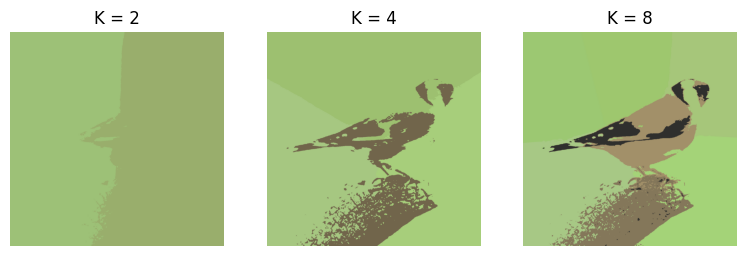

In [8]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

(1024, 1024, 3)


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[159.07190178 207.55992851 112.15820601]
 [126.71058006 113.98609602  82.48229416]
 [ 30.97655215  39.54939341  46.03904577]
 [165.56588386 162.88804441 146.30409906]
 [224.36283186 224.22076485 221.3283818 ]
 [154.38270889 138.35584495 110.9663178 ]
 [ 75.2706662   54.21032438  26.42204395]
 [162.82181573 211.23907596 119.80105608]
 [156.33430723 191.0106953  115.05784322]
 [224.08717105 203.51480263  67.77850877]
 [189.52261775 190.67428364 179.43603296]
 [ 96.91161517  80.77528354  49.49644114]
 [ 47.83008252  59.32833208  74.27494374]
 [150.44308261 146.11691292 132.8817439 ]
 [174.68042441 204.01421201 141.8165093 ]
 [140.657651   182.31581929 107.27059316]
 [129.83797468 126.45785555 112.95778109]
 [166.64972491 216.79142839 117.14035151]
 [ 87.32440352  95.66178317  94.61783173]
 [238.22601279 213.37441365  21.13219616]
 [169.02620647 154.63872194 122.36693477]
 [185.46857816 145.48350353  28.71327573]
 [146.79099957 114.14135295  58.91951536]
 [195.73176253 174.92571252 135.68

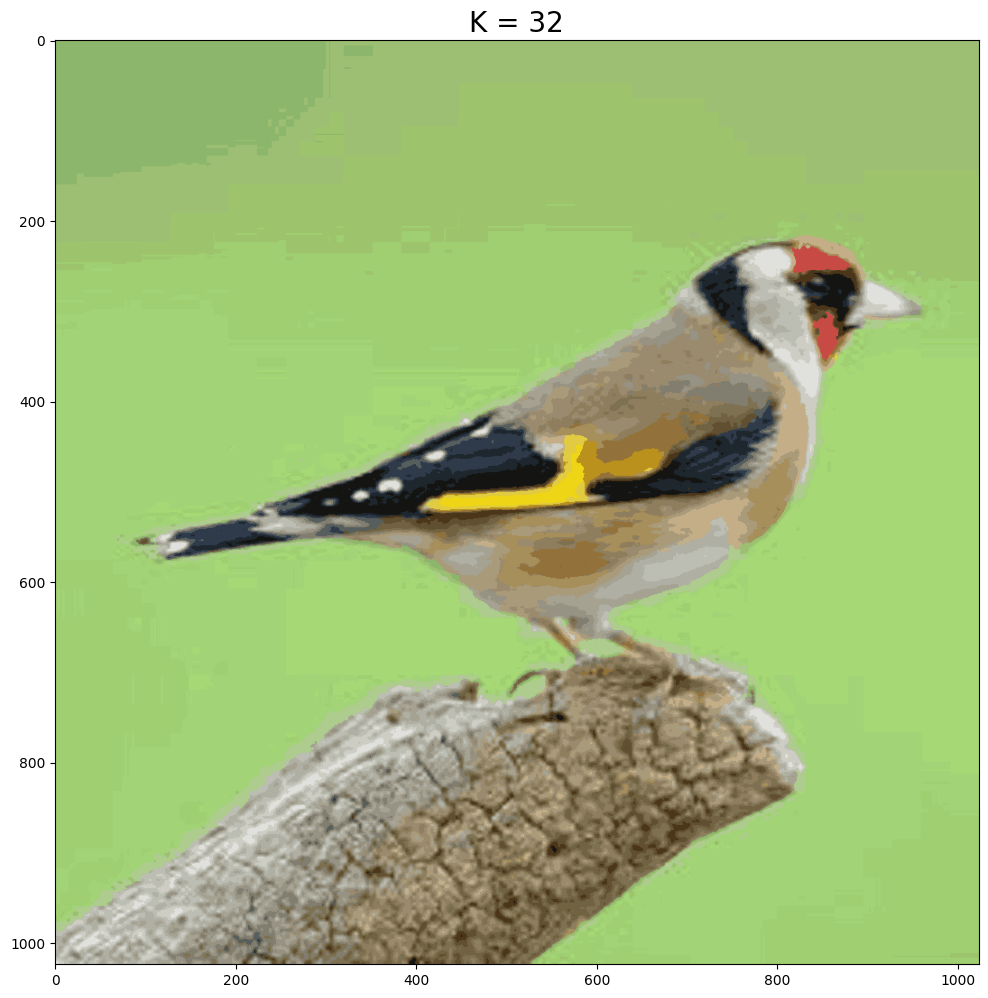

In [9]:
h, w, c = img.shape
print(img.shape)
Z = img.reshape((-1,3))
Ka = [32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    # Perform k-means clustering
    label, center = km_clust(Z, K)
    # Now convert back to uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    plt.subplot(1, len(Ka), i+1)
    plt.title('K = %d'%K, fontsize=20)
    plt.imshow(res)
plt.show()